# M. Zain Ikhlaq
> 467999


## 1. Objective
- Load and explore datasets, separating features and labels for ML tasks.
- Split data into training and testing sets to ensure fair evaluation.
- Handle missing values and outliers using common preprocessing techniques.
- Apply scaling and encoding methods to prepare data for machine learning models.

## 2. Core Ideas
- Data quality is more important than algorithm complexity.
- Proper train/test splits prevent biased evaluation.
- Preprocessing steps (cleaning, scaling, encoding) are essential before modeling.
- Feature importance and correlation help us understand what drives predictions.

## Working with Features & Labels

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()

# Convert to pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
# Separating Features and Labels
X = df.drop('species', axis=1)
y = df['species']

print("Shape of Features (X):", X.shape)
print("Shape of Labels (y):", y.shape)

print("First 5 rows of Features (X):")
display(X.head())

print("First 5 rows of Labels (y):")
display(y.head())

Shape of Features (X): (150, 4)
Shape of Labels (y): (150,)
First 5 rows of Features (X):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


First 5 rows of Labels (y):


0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [3]:
# Decoding Labels (Optional)
label_map = dict(zip(range(3), iris.target_names))
df['species_name'] = df['species'].map(label_map)
df[['species', 'species_name']].head()

,species,species_name
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa


## Splitting Training and Testing Data

In [27]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=32)

print("Shape of Training Features (X_train):", X_train.shape)
print("Shape of Testing Features  (X_test):", X_test.shape)
print("Shape of Training Labels   (y_train):", y_train.shape)
print("Shape of Testing Labels    (y_test):", y_test.shape)

print("First 5 rows of Training Features:")
display(X_train.head())

print("First 5 Training Labels:")
print(y_train.head().values)

print("First 5 rows of Testing Features:")
display(X_test.head())

print("First 5 Testing Labels:")
print(y_test.head().values)

# Check overlap
overlap = X_train.merge(X_test, how='inner')
print("Overlap between Train and Test sets:", overlap.shape[0], "rows")

Shape of Training Features (X_train): (60, 4)
Shape of Testing Features  (X_test): (90, 4)
Shape of Training Labels   (y_train): (60,)
Shape of Testing Labels    (y_test): (90,)
First 5 rows of Training Features:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
148,6.2,3.4,5.4,2.3
84,5.4,3.0,4.5,1.5
48,5.3,3.7,1.5,0.2
92,5.8,2.6,4.0,1.2
114,5.8,2.8,5.1,2.4


First 5 Training Labels:
[2 1 0 1 2]
First 5 rows of Testing Features:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
55,5.7,2.8,4.5,1.3
22,4.6,3.6,1.0,0.2
26,5.0,3.4,1.6,0.4
56,6.3,3.3,4.7,1.6
134,6.1,2.6,5.6,1.4


First 5 Testing Labels:
[1 0 0 1 2]
Overlap between Train and Test sets: 0 rows


## Handling Missing Values & Outliers

In [ ]:
%pip install seaborn

In [6]:
import seaborn as sns

# Load Titanic dataset
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# Missing values count
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
# Handle missing values
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['fare'].fillna(titanic['fare'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
titanic['sex'].fillna(titanic['sex'].mode()[0], inplace=True)

C:\Users\legen\AppData\Local\Temp\ipykernel_14028\1375064317.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\legen\AppData\Local\Temp\ipykernel_14028\1375064317.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [9]:
# Detect outliers (Z-score method)
from scipy import stats

z_scores = stats.zscore(titanic['age'])
outliers_z = titanic[(abs(z_scores) > 3)]
print("Number of outliers detected (Z-score):", outliers_z.shape[0])
outliers_z[['age']].head()

Number of outliers detected (Z-score): 7


,age
96,71.0
116,70.5
493,71.0
630,80.0
672,70.0


In [10]:
# Detect outliers (IQR method)
Q1 = titanic['age'].quantile(0.25)
Q3 = titanic['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = titanic[(titanic['age'] < lower_bound) | (titanic['age'] > upper_bound)]
print("Number of outliers detected (IQR):", outliers_iqr.shape[0])
outliers_iqr[['age']].head()

Number of outliers detected (IQR): 66


,age
7,2.0
11,58.0
15,55.0
16,2.0
33,66.0


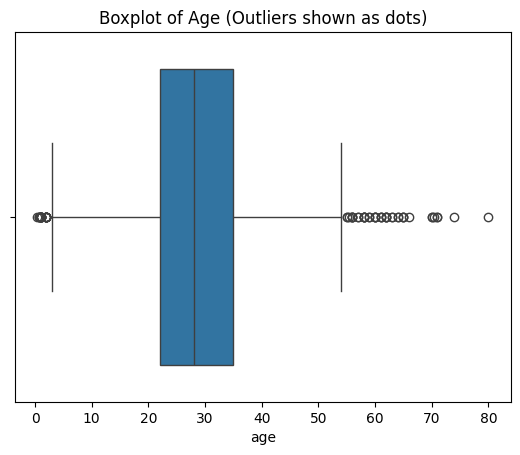

In [11]:
# Visualize outliers
import matplotlib.pyplot as plt

sns.boxplot(x=titanic['age'])
plt.title("Boxplot of Age (Outliers shown as dots)")
plt.show()

## Normalization and Standardization

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numerical features
num_features = titanic[['age', 'fare']].copy()
num_features.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [13]:
# Normalization
minmax_scaler = MinMaxScaler()
num_norm = pd.DataFrame(minmax_scaler.fit_transform(num_features), columns=['age_norm', 'fare_norm'])
num_norm.head()

,age_norm,fare_norm
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


In [14]:
# Standardization
std_scaler = StandardScaler()
num_std = pd.DataFrame(std_scaler.fit_transform(num_features), columns=['age_std', 'fare_std'])
num_std.head()

,age_std,fare_std
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337


## Encoding Categorical Data

In [15]:
# Select categorical features
cat_features = titanic[['sex', 'class']].copy()
cat_features.head()

,sex,class
0,male,Third
1,female,First
2,female,Third
3,female,First
4,male,Third


In [16]:
# One-Hot Encoding
class_encoded = pd.get_dummies(cat_features['class'], prefix='class')
display(class_encoded.head())

,class_First,class_Second,class_Third
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True


In [17]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
sex_encoded = le.fit_transform(cat_features['sex'])
sex_encoded_df = pd.DataFrame({'sex': cat_features['sex'], 'sex_encoded': sex_encoded})
display(sex_encoded_df.head())

,sex,sex_encoded
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


In [18]:
# Combine Encoded Features
encoded_df = pd.concat([sex_encoded_df['sex_encoded'], class_encoded], axis=1)
encoded_df.head()

,sex_encoded,class_First,class_Second,class_Third
0,1,False,False,True
1,0,True,False,False
2,0,False,False,True
3,0,True,False,False
4,1,False,False,True


## Mini Challenge

In [28]:
# ML model on Iris dataset (Logistic Regression Example)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.90      0.96      0.93        28
           2       0.96      0.88      0.92        26

    accuracy                           0.96        90
   macro avg       0.95      0.95      0.95        90
weighted avg       0.96      0.96      0.96        90



In [3]:
import seaborn as sns
# Titanic: Drop rows where age is missing
titanic_drop_age = sns.load_dataset("titanic")
print("Original size:", titanic_drop_age.shape)
titanic_drop_age = titanic_drop_age.dropna(subset=['age'])
print("After dropping rows with missing age:", titanic_drop_age.shape)

Original size: (891, 15)
After dropping rows with missing age: (714, 15)


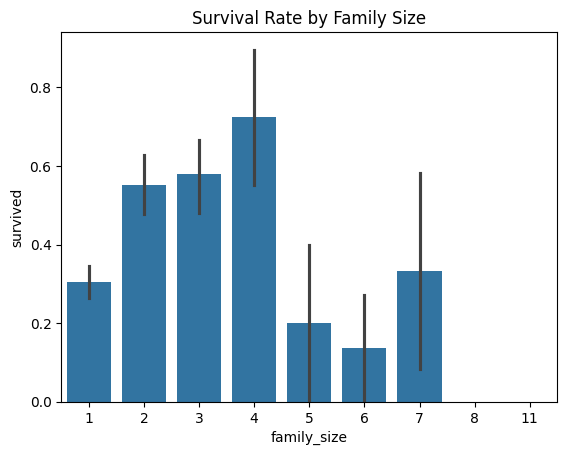

In [22]:
# Feature Engineering: family_size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
sns.barplot(x='family_size', y='survived', data=titanic)
plt.title("Survival Rate by Family Size")
plt.show()

In [23]:
# One-Hot Encoding for 'embarked'
embarked_encoded = pd.get_dummies(titanic['embarked'], prefix='embarked')
embarked_encoded.head()

,embarked_C,embarked_Q,embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
